Problem 2

<br><b>Introduction</b><br>

This task we explore the usage of numpy package and its function on a historical daily close prices of Bitcoin against US dollar. The whole data is imported but we primarly focuses on Q3 quarter of the financial year. The data will be downloaded and preprocessed without using pandas. Then key insights and stats will be extracted. New data will be found using existing one. Multiple visual representations will be used to extract informations. Outliers will be found out using numpy. This task can be further extended in the various dimensions.

1. We have successfully downloaded the data from provided link. Used MS Excel to manually remove everything except the numeric values in the Close column. All the column labels were also deleted. Exported this to a CSV file.

2. Next we are using numpy to read the data as numpy vector.

In [1]:
import numpy as np
import matplotlib.pyplot as plt #Library import

rates = np.genfromtxt("BTC-USD.csv")

Here we used numpy to read the data and store it in the vector rates.

3. Now for the Q3 2023 we found some aggregates and displayed it.

In [2]:
#Since the Q3 is days 182-273 inclusive we will extract those data using array slicing
q3_data = rates[181:273]

In [3]:
#Now lets calculate the aggregate mentioned

a_mean = np.mean(q3_data) #Arithmetic Mean
minimum = np.min(q3_data) #Minimum
f_quartile = np.quantile(q3_data,.25) #1st quartile
median = np.median(q3_data) #Median
t_quartile = np.quantile(q3_data,.75) #Third quartile
maximum = np.max(q3_data) #Maximum values
std_dev = np.std(q3_data) #Standard Deviation
iqr = t_quartile-f_quartile #Inter quartile range

Different aggregate function of numpy is used for the calculations

In [4]:
# Display the aggregates
print("Aggregates for Q3 2023\n")
print(f"Arithmetic Mean: {a_mean:.2f}")
print(f"Minimum: {minimum:.2f}")
print(f"First Quartile: {f_quartile:.2f}")
print(f"Median: {median:.2f}")
print(f"Third Quartile: {t_quartile:.2f}")
print(f"Maximum: {maximum:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Interquartile Range: {iqr:.2f}")

Aggregates for Q3 2023

Arithmetic Mean: 28091.33
Minimum: 25162.65
First Quartile: 26225.56
Median: 28871.82
Third Quartile: 29767.07
Maximum: 31476.05
Standard Deviation: 1827.04
Interquartile Range: 3541.51


Successfully displayed the output of different functions.

<br>
4. We plotted the Q3 data using pyplot.

In [5]:
#Since we need number of days to plot the Q3 we are going to count the number of days in Q3.
days = np.arange(182,274) #182 denoting July 1

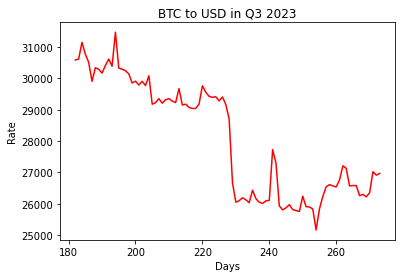

In [6]:
#Now lets plot the data with the given constrain

plt.plot(days,q3_data,'-r') #Calling the function
plt.title("BTC to USD in Q3 2023") #Title creation
plt.xlabel('Days') #Two labels
plt.ylabel('Rate')
plt.show() #Displaying

A line plot with red solid line segments is created. From the graph we can see that at the beginning of Q3 the BTC to USD rates are all time high but when it reaches the end of the Q3 the rates are lowest. This downfall starts exactly when it is middle of the Q3 quarter.

<br>
5. We found days with lowest and highest observed prices in Q3 2023 with the help of numpy function.

In [7]:
# Day with the lowest price.

lp_day = np.argmin(q3_data)+182  #182 is added to sync with the date
lp = np.min(q3_data) 

# Day with the highest price.
hp_day = np.argmax(q3_data)+182  #182 is added to sync with the date
hp = np.max(q3_data)

In [8]:
print(f"Lowest price was on day {lp_day} ({lp:.2f}).")
print(f"Highest price was on day {hp_day} ({hp:.2f}).")

Lowest price was on day 254 (25162.65).
Highest price was on day 194 (31476.05).


Successfully displayed the lowest price and highest price and the corresponding days which it occured.


<br>6. Calculated the daily price increase/decreases of the Q3 data and plotted it.

In [9]:
# Lets calculate Q3 daily price increase/decrease using numpy.diff
price_variation = np.diff(q3_data)

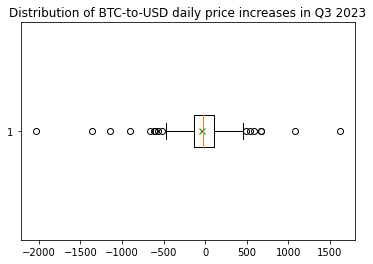

In [10]:
#Now lets plot the boxplot with whiskers
plt.boxplot(price_variation,vert=False) #the boxplot is created
plt.title('Distribution of BTC-to-USD daily price increases in Q3 2023')

plt.plot(np.mean(price_variation),1,'gx') # x is marked on 1 gives the coordinate 
plt.show()

Above plot gives the visual representation of the variation  of daily price changes. The IQR represents the first and third quartile of the data. Whiskers gives the min and max values. The line represents the median of the data.Mean is represented using 'x' mark. We can see outliers present in the data.

<br><br>
7. We found the number of outliers present in the boxplot programmatically.

In [11]:
#Inorder to find outliers we need to find IQR and its bounds.
q1 = np.percentile(price_variation,25) #q1 and q3 are found
q3 = np.percentile(price_variation,75)
box_iqr = q3-q1  #Finding iqr of the boxplot by subtracting from the bound.

In [12]:
#Substituting in the equation
lower_bound = q1-1.5*box_iqr
upper_bound = q3+1.5*box_iqr

In [13]:
#Now lets count the number of outliers using numpy, the values falling outside these bounds are considered outliers

outliers = np.sum((price_variation < lower_bound) | (price_variation > upper_bound)) #Checking if each value is in the range or not

print(f"There are {outliers} outliers.")

There are 16 outliers.


In the current context some of these outliers might not be an anomaly. Since it is a financial data there is a possibility of sudden fluctuation in the rates caused by external factors. But analysing outliers can give us insights into the unusual market conditions or potential risks.